# Определение g-фактора

<font size="5">
   Найдём индукцию магнитного поля<br>
   
   В катушке 1 :<br><br>
   $B_{1} = μ_{0} N_{1}J$<br>
   $N_{1} = 1500;\, J = 0.172A$<br>
   $B_{1} \approx 3.2\,Гс$

In [4]:
import numpy as np
p = np.pi
c = 2.99 * 10**8
μ = 4*p*10**(-7)


N1 = 1500
N2 = 4500
D1 = 0.3 #m
D2 = 0.23#m
J = 0.172 #сгс

B1 = μ*N1*J #Тл
#print(B1)
F1 = B1*D1*D1/4
#print(F1)

B = B1 * ((D1/D2)**2)*(N1/N2)
print(B)

0.00018386334320442336


<font size="5">
    $Ф_{1} = Ф_{2}$<br>
    $B = B_{1} (\frac{D_{1}}{D_{2}})^{2} \frac{N_{1}}{N_{2}};\,\,N_{2} = 1500,\,D_{1} = 0.23mm,\,D_{2} = 0.3mm$<br>
    $B_{расчётная} \approx 1.8\,Гс$

<font size="5">
    Найдём эксперимениальную индукцию магнитного поля<br>
    $V = nBSω$<br>
    $V = 0.53mV$<br>
   n, S - Число витков и площади пробной катушки<br>
   n = 46; D = 14.6mm<br>
   ω - угловая частота переменного тока (2π * 50Hz)<br><br>
   $B \approx 2.1\,Гс$<br>
   Теоретическая оценка близка к экспериментальному значению

In [3]:
V = 0.53/1000
n = 46
D = 14.6/1000
p = np.pi
S = p*D*D/4
ω = 2*p*50
B = V/(n*S*ω)
print(B)

0.00021906478632274193


<font size="5">
    $\large g = \frac{\hbar ω_{0}}{μ_{Б}B} $<br>
    $ω_{0} = 128\,Mhz;\,$
    $μ_{Б} = 927\, 10^{-26} J/Тл$<br>
    $g \approx 2$<br><br>
    Полученный g-фактор заметно отличается от табличного значения
    

In [18]:
μb = 927 * 10**(-26)
ω = 128 * 10**(6)
h = 6.63 * 10**(-34)
B = 2.1 * 10**(-4)

g = (h*ω/(2*p))/(μb*B)
#print(g)

<font size="5">

<font size="4">
    $\large \frac{ΔL_{1/2}}{2L} = \frac{1}{7}$<br>
    Ширина линии ЭПР: $ΔB \approx B/7 \approx 0.31\,Гс$<br><br>

## Калибровка поля электромагнита 

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [31]:
# V, mB
V=pd.DataFrame({
    'V_R':[4.07, 6.38, 10.65, 12.78, 14.29],
    'V_перед':[0.50, 0.76, 0.94, 1.04, 1.22],
    'V_зад':[0.48, 0.77, 0.96, 1.06, 1.20],
    'V_сред':[0.49, 0.75,0.95, 1.05, 1.21]
})

In [32]:
V

,V_R,V_перед,V_зад,V_сред
0,4.07,0.50,0.48,0.49
1,6.38,0.76,0.77,0.75
2,10.65,0.94,0.96,0.95
3,12.78,1.04,1.06,1.05
4,14.29,1.22,1.20,1.21


In [51]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scipy
from scipy.optimize import curve_fit
plt.rc('xtick',labelsize=20); plt.rc('ytick',labelsize=20)
plt.rcParams['figure.figsize'] = (8,5)

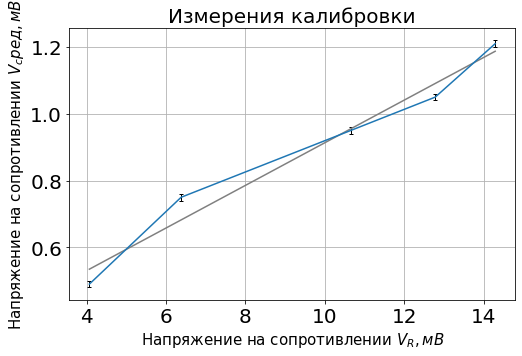

In [52]:
ax = plt.axes()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2));
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1));

V_R = np.array([4.07, 6.38, 10.65, 12.78, 14.29])
V_сред = np.array([0.49, 0.75,0.95, 1.05, 1.21])

yerror=0.01
plt.errorbar(V_R,V_сред, yerr=yerror, ecolor='black', elinewidth=1, capsize=2)

def model_f(x,a,b):
    return a*x + b

popt, pcov = curve_fit(model_f, V_R, V_сред, p0=[1.4,26.8])

a_opt, b_opt = popt
x_model = np.linspace(min(V_R), max(V_R))
y_model = model_f(x_model, a_opt, b_opt)

plt.title('Измерения калибровки', size=20)
plt.xlabel('Напряжение на сопротивлении $V_R, мВ$',size=15)
plt.ylabel('Напряжение на сопротивлении $V_сред, мВ$',size=15)


plt.plot(x_model,y_model, color='grey')
plt.grid()